Load Dataset (Suppress Warnings)

In [ ]:
from sklearn.datasets import load_boston
import numpy as np
import matplotlib.pyplot as plt
import warnings
from sklearn.model_selection import KFold, train_test_split
from sklearn.preprocessing import PolynomialFeatures

with warnings.catch_warnings():
    warnings.filterwarnings("ignore")
    X_original, y_original = load_boston(return_X_y=True)

Helper Functions

OLS Average Training MSE across folds: 23.7880054222369
OLS Average Test MSE across folds: 33.61027986550262


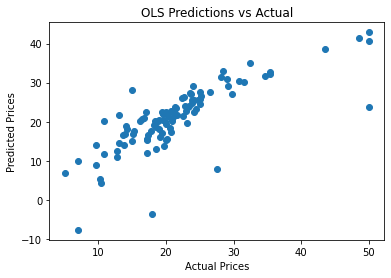


Best Lambda for Ridge: 10.0
Ridge Average Training MSE across folds: 46.98080420587128
Ridge Average Test MSE across folds: 65.21487005423741
Ridge (Best Lambda) Average Training MSE: 23.909221885941406
Ridge (Best Lambda) Average Test MSE: 32.273044282891696


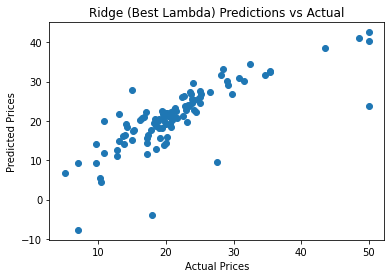


Best Lambda for Ridge (Polynomial Features): 1000000.0
Poly Ridge Average Training MSE: 10.370228452402104
Poly Ridge Average Test MSE: 55.1467225811635
Poly Ridge (Best Lambda) Average Training MSE: 13.0091285997717
Poly Ridge (Best Lambda) Average Test MSE: 36.90490457354839


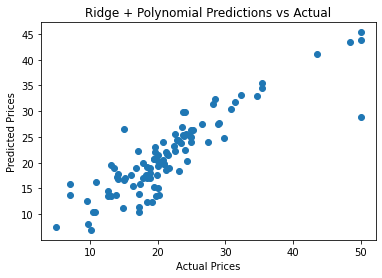


Gradient Descent OLS Average Training MSE: nan
Gradient Descent OLS Average Test MSE: nan


/tmp/ipykernel_289378/1825552643.py:208: RuntimeWarning: invalid value encountered in subtract
  theta -= L * gradient


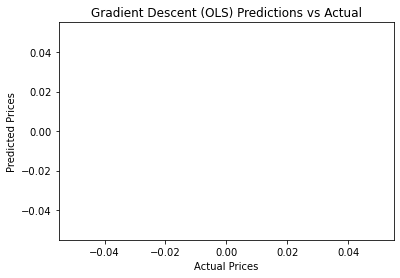

/tmp/ipykernel_289378/1825552643.py:257: RuntimeWarning: invalid value encountered in subtract
  theta -= L * gradient



Gradient Descent Ridge Average Training MSE: nan
Gradient Descent Ridge Average Test MSE: nan


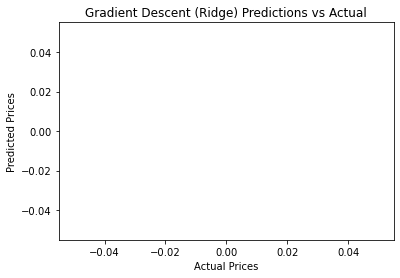


Lasso Average Training MSE: nan
Lasso Average Test MSE: nan


/tmp/ipykernel_289378/1825552643.py:302: RuntimeWarning: invalid value encountered in subtract
  theta -= L * gradient


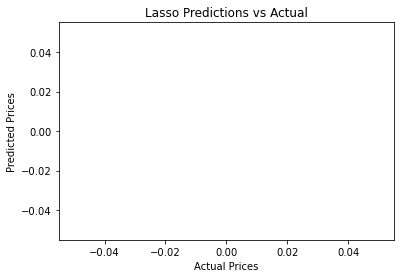


Elastic Net Average Training MSE: 23.788178362861238
Elastic Net Average Test MSE: 33.608895641263835


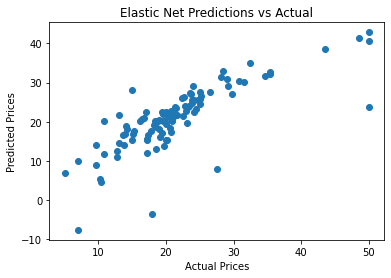

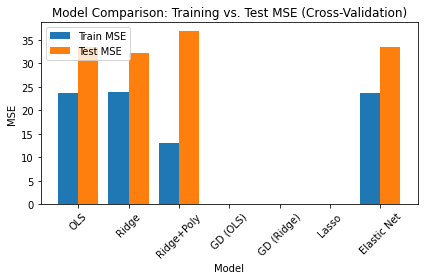

In [ ]:
def findTheta(X, y):
    """Analytical solution for OLS: theta = (X^T X)^(-1) X^T y"""
    theta = np.dot(np.linalg.inv(np.dot(X.T, X)), np.dot(X.T, y))
    return theta

def computeMSE(X, y, theta):
    """Compute Mean Squared Error for predictions"""
    pred = np.dot(X, theta)
    return np.mean((pred - y) ** 2)

def findThetaRR(X, y, Lambda):
    """Analytical solution for Ridge: theta = (X^T X + lambda*I)^(-1) X^T y"""
    I = np.eye(X.shape[1])
    I[-1, -1] = 0  # do not penalize bias term
    theta = np.dot(np.linalg.inv(np.dot(X.T, X) + Lambda * I), np.dot(X.T, y))
    return theta

1) OLS (Analytical) with Cross-Validation

In [ ]:
X = X_original.copy()
y = y_original.copy()

kf = KFold(n_splits=10)
train_mse_score_ols = []
test_mse_score_ols = []

for train_idx, test_idx in kf.split(X):
    X_train, X_test = X[train_idx], X[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]

    theta_ols = findTheta(X_train, y_train)
    trainMSE = computeMSE(X_train, y_train, theta_ols)
    testMSE = computeMSE(X_test, y_test, theta_ols)

    train_mse_score_ols.append(trainMSE)
    test_mse_score_ols.append(testMSE)

avg_train_mse_ols = np.mean(train_mse_score_ols)
avg_test_mse_ols = np.mean(test_mse_score_ols)

print("OLS Average Training MSE across folds:", avg_train_mse_ols)
print("OLS Average Test MSE across folds:", avg_test_mse_ols)

X_train_vis, X_test_vis, y_train_vis, y_test_vis = train_test_split(
    X, y, test_size=0.2, random_state=42
)
theta_ols_vis = findTheta(X_train_vis, y_train_vis)
y_pred_ols = np.dot(X_test_vis, theta_ols_vis)

plt.scatter(y_test_vis, y_pred_ols)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("OLS Predictions vs Actual")
plt.show()

 2) Ridge Regression (Analytical) with Cross-Validation & Best Lambda

In [ ]:
lambda_values = np.logspace(1, 7, num=13)
ridge_train_scores = []
ridge_test_scores = []

for Lambda in lambda_values:
    kf_ridge = KFold(n_splits=10)
    test_mse_score = []
    train_mse_score = []

    for train_idx, test_idx in kf_ridge.split(X):
        X_train, X_test = X[train_idx], X[test_idx]
        y_train, y_test = y[train_idx], y[test_idx]

        theta_ridge = findThetaRR(X_train, y_train, Lambda)

        trainMSE = computeMSE(X_train, y_train, theta_ridge)
        testMSE = computeMSE(X_test, y_test, theta_ridge)

        train_mse_score.append(trainMSE)
        test_mse_score.append(testMSE)

    ridge_train_scores.append(np.mean(train_mse_score))
    ridge_test_scores.append(np.mean(test_mse_score))

best_lambda_ridge = lambda_values[np.argmin(ridge_test_scores)]
print("\nBest Lambda for Ridge:", best_lambda_ridge)
print("Ridge Average Training MSE across folds:", np.mean(ridge_train_scores))
print("Ridge Average Test MSE across folds:", np.mean(ridge_test_scores))

# Evaluate best lambda again
kf_ridge = KFold(n_splits=10)
train_mse_score_best = []
test_mse_score_best = []

for train_idx, test_idx in kf_ridge.split(X):
    X_train, X_test = X[train_idx], X[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]

    theta_ridge_best = findThetaRR(X_train, y_train, best_lambda_ridge)
    train_mse_score_best.append(computeMSE(X_train, y_train, theta_ridge_best))
    test_mse_score_best.append(computeMSE(X_test, y_test, theta_ridge_best))

avg_train_mse_ridge = np.mean(train_mse_score_best)
avg_test_mse_ridge = np.mean(test_mse_score_best)

print("Ridge (Best Lambda) Average Training MSE:", avg_train_mse_ridge)
print("Ridge (Best Lambda) Average Test MSE:", avg_test_mse_ridge)

# Visualize predictions
theta_ridge_vis = findThetaRR(X_train_vis, y_train_vis, best_lambda_ridge)
y_pred_ridge = np.dot(X_test_vis, theta_ridge_vis)

plt.scatter(y_test_vis, y_pred_ridge)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Ridge (Best Lambda) Predictions vs Actual")
plt.show()

3) Ridge Regression with Polynomial Features

In [ ]:
X_poly = PolynomialFeatures(degree=2).fit_transform(X_original)
lambda_values_poly = np.logspace(1, 7, num=13)
ridge_train_scores_poly = []
ridge_test_scores_poly = []

for Lambda in lambda_values_poly:
    kf_poly = KFold(n_splits=10)
    tmp_train_mse_score = []
    tmp_test_mse_score = []

    for train_idx, test_idx in kf_poly.split(X_poly):
        X_train, X_test = X_poly[train_idx], X_poly[test_idx]
        y_train, y_test = y_original[train_idx], y_original[test_idx]

        theta_ridge_poly = findThetaRR(X_train, y_train, Lambda)

        tmp_train_mse_score.append(computeMSE(X_train, y_train, theta_ridge_poly))
        tmp_test_mse_score.append(computeMSE(X_test, y_test, theta_ridge_poly))

    ridge_train_scores_poly.append(np.mean(tmp_train_mse_score))
    ridge_test_scores_poly.append(np.mean(tmp_test_mse_score))

best_lambda_ridge_poly = lambda_values_poly[np.argmin(ridge_test_scores_poly)]
print("\nBest Lambda for Ridge (Polynomial Features):", best_lambda_ridge_poly)
print("Poly Ridge Average Training MSE:", np.mean(ridge_train_scores_poly))
print("Poly Ridge Average Test MSE:", np.mean(ridge_test_scores_poly))

# Evaluate with best lambda
kf_poly = KFold(n_splits=10)
train_mse_score_poly_best = []
test_mse_score_poly_best = []

for train_idx, test_idx in kf_poly.split(X_poly):
    X_train, X_test = X_poly[train_idx], X_poly[test_idx]
    y_train, y_test = y_original[train_idx], y_original[test_idx]

    theta_poly_best = findThetaRR(X_train, y_train, best_lambda_ridge_poly)
    train_mse_score_poly_best.append(computeMSE(X_train, y_train, theta_poly_best))
    test_mse_score_poly_best.append(computeMSE(X_test, y_test, theta_poly_best))

avg_train_mse_poly_ridge = np.mean(train_mse_score_poly_best)
avg_test_mse_poly_ridge = np.mean(test_mse_score_poly_best)

print("Poly Ridge (Best Lambda) Average Training MSE:", avg_train_mse_poly_ridge)
print("Poly Ridge (Best Lambda) Average Test MSE:", avg_test_mse_poly_ridge)

# Visualize predictions
X_poly_vis_train = PolynomialFeatures(degree=2).fit_transform(X_train_vis)
X_poly_vis_test = PolynomialFeatures(degree=2).fit_transform(X_test_vis)
theta_poly_ridge_vis = findThetaRR(X_poly_vis_train, y_train_vis, best_lambda_ridge_poly)
y_pred_poly_ridge = np.dot(X_poly_vis_test, theta_poly_ridge_vis)

plt.scatter(y_test_vis, y_pred_poly_ridge)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Ridge + Polynomial Predictions vs Actual")
plt.show()

4) Gradient Descent (OLS)

In [ ]:
def gradientDescent(X, y, theta):
    m = y.shape[0]
    epochs = 1000
    L = 1e-5  # smaller learning rate
    for _ in range(epochs):
        gradient = (2/m) * X.T.dot(X.dot(theta) - y)
        theta -= L * gradient
    return theta

kf_gd = KFold(n_splits=10)
train_mse_score_gd = []
test_mse_score_gd = []

for train_idx, test_idx in kf_gd.split(X):
    X_train_gd, X_test_gd = X[train_idx], X[test_idx]
    y_train_gd, y_test_gd = y[train_idx], y[test_idx]

    # Start with the analytical theta using only the training fold
    theta_init = findTheta(X_train_gd, y_train_gd)
    # Run gradient descent on the training fold
    theta_gd = gradientDescent(X_train_gd, y_train_gd, theta_init)

    train_mse_score_gd.append(computeMSE(X_train_gd, y_train_gd, theta_gd))
    test_mse_score_gd.append(computeMSE(X_test_gd, y_test_gd, theta_gd))

avg_train_mse_gd = np.mean(train_mse_score_gd)
avg_test_mse_gd = np.mean(test_mse_score_gd)

print("\nGradient Descent OLS Average Training MSE:", avg_train_mse_gd)
print("Gradient Descent OLS Average Test MSE:", avg_test_mse_gd)

# Visualize
theta_init_vis = findTheta(X_train_vis, y_train_vis)
theta_gd_vis = gradientDescent(X_train_vis, y_train_vis, theta_init_vis)
y_pred_gd = np.dot(X_test_vis, theta_gd_vis)

plt.scatter(y_test_vis, y_pred_gd)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Gradient Descent (OLS) Predictions vs Actual")
plt.show()

5) Gradient Descent Ridge

In [ ]:
def gradientDescentRR(X, y, theta):
    m = y.shape[0]
    epochs = 1000
    L = 1e-5  # smaller learning rate
    alpha = 1  # ridge coefficient
    for _ in range(epochs):
        # Exclude bias term (index 0) from ridge
        weights = np.insert(theta[1:], 0, 0, axis=0)
        ridge = alpha * weights
        gradient = (2/m) * X.T.dot(X.dot(theta) - y) + ridge
        theta -= L * gradient
    return theta

kf_ridge_gd = KFold(n_splits=10)
train_mse_score_ridge_gd = []
test_mse_score_ridge_gd = []

for train_idx, test_idx in kf_ridge_gd.split(X):
    X_train_rdg, X_test_rdg = X[train_idx], X[test_idx]
    y_train_rdg, y_test_rdg = y[train_idx], y[test_idx]

    theta_init_ridge = findTheta(X_train_rdg, y_train_rdg)
    theta_ridge_gd = gradientDescentRR(X_train_rdg, y_train_rdg, theta_init_ridge)

    train_mse_score_ridge_gd.append(computeMSE(X_train_rdg, y_train_rdg, theta_ridge_gd))
    test_mse_score_ridge_gd.append(computeMSE(X_test_rdg, y_test_rdg, theta_ridge_gd))

avg_train_mse_ridge_gd = np.mean(train_mse_score_ridge_gd)
avg_test_mse_ridge_gd = np.mean(test_mse_score_ridge_gd)

print("\nGradient Descent Ridge Average Training MSE:", avg_train_mse_ridge_gd)
print("Gradient Descent Ridge Average Test MSE:", avg_test_mse_ridge_gd)

# Visualize
theta_init_vis_ridge = findTheta(X_train_vis, y_train_vis)
theta_ridge_gd_vis = gradientDescentRR(X_train_vis, y_train_vis, theta_init_vis_ridge)
y_pred_ridge_gd = np.dot(X_test_vis, theta_ridge_gd_vis)

plt.scatter(y_test_vis, y_pred_ridge_gd)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Gradient Descent (Ridge) Predictions vs Actual")
plt.show()

6) Lasso Regression (Gradient-based)

In [ ]:
def LassoRegression(X, y, theta, Lambda):
    m = y.shape[0]
    epoch = 1000
    L = 1e-3  # slightly larger than for OLS, but still small
    threshold = 1e-7
    for _ in range(epoch):
        l1reg = Lambda * np.sign(theta)
        gradient = (2/m) * X.T.dot(X.dot(theta) - y) + l1reg
        theta -= L * gradient

        if np.max(np.abs(gradient)) < threshold:
            break
    return theta

kf_lasso = KFold(n_splits=10)
train_mse_score_lasso = []
test_mse_score_lasso = []

for train_idx, test_idx in kf_lasso.split(X):
    X_train_ls, X_test_ls = X[train_idx], X[test_idx]
    y_train_ls, y_test_ls = y[train_idx], y[test_idx]

    theta_init_lasso = findTheta(X_train_ls, y_train_ls)
    theta_lasso = LassoRegression(X_train_ls, y_train_ls, theta_init_lasso, Lambda=1)

    train_mse_score_lasso.append(computeMSE(X_train_ls, y_train_ls, theta_lasso))
    test_mse_score_lasso.append(computeMSE(X_test_ls, y_test_ls, theta_lasso))

avg_train_mse_lasso = np.mean(train_mse_score_lasso)
avg_test_mse_lasso = np.mean(test_mse_score_lasso)

print("\nLasso Average Training MSE:", avg_train_mse_lasso)
print("Lasso Average Test MSE:", avg_test_mse_lasso)

# Visualize
theta_init_lasso_vis = findTheta(X_train_vis, y_train_vis)
theta_lasso_vis = LassoRegression(X_train_vis, y_train_vis, theta_init_lasso_vis, 1)
y_pred_lasso = np.dot(X_test_vis, theta_lasso_vis)

plt.scatter(y_test_vis, y_pred_lasso)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Lasso Predictions vs Actual")
plt.show()

7) Elastic Net (Gradient-based)

In [ ]:
def elasticNet(X, y, theta):
    ratio = 0.5
    alpha = 0.1
    num_iteration = 1000
    L = 1e-3
    threshold = 1e-4

    m = y.shape[0]
    for _ in range(num_iteration):
        gradient = (2/m) * X.T.dot(X.dot(theta) - y)
        l1_gradient = ratio * alpha * np.sign(theta)
        l2_gradient = (1-ratio) * alpha * theta
        total_gradient = gradient + l1_gradient + l2_gradient
        theta -= L * total_gradient

        if np.max(np.abs(gradient)) < threshold:
            break
    return theta

kf_elastic = KFold(n_splits=10)
train_mse_score_elastic = []
test_mse_score_elastic = []

for train_idx, test_idx in kf_elastic.split(X):
    X_train_en, X_test_en = X[train_idx], X[test_idx]
    y_train_en, y_test_en = y[train_idx], y[test_idx]

    theta_init_elastic = findTheta(X_train_en, y_train_en)
    theta_elastic = elasticNet(X_train_en, y_train_en, theta_init_elastic)

    train_mse_score_elastic.append(computeMSE(X_train_en, y_train_en, theta_elastic))
    test_mse_score_elastic.append(computeMSE(X_test_en, y_test_en, theta_elastic))

avg_train_mse_elastic = np.mean(train_mse_score_elastic)
avg_test_mse_elastic = np.mean(test_mse_score_elastic)

print("\nElastic Net Average Training MSE:", avg_train_mse_elastic)
print("Elastic Net Average Test MSE:", avg_test_mse_elastic)

# Visualize
theta_init_elastic_vis = findTheta(X_train_vis, y_train_vis)
theta_elastic_vis = elasticNet(X_train_vis, y_train_vis, theta_init_elastic_vis)
y_pred_elastic = np.dot(X_test_vis, theta_elastic_vis)

plt.scatter(y_test_vis, y_pred_elastic)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Elastic Net Predictions vs Actual")
plt.show()


8) Comparison Bar Chart of All Models (Cross-Validation Averages)

In [ ]:
models = [
    "OLS",
    "Ridge",
    "Ridge+Poly",
    "GD (OLS)",
    "GD (Ridge)",
    "Lasso",
    "Elastic Net"
]
train_mses = [
    avg_train_mse_ols,
    avg_train_mse_ridge,
    avg_train_mse_poly_ridge,
    avg_train_mse_gd,
    avg_train_mse_ridge_gd,
    avg_train_mse_lasso,
    avg_train_mse_elastic
]
test_mses = [
    avg_test_mse_ols,
    avg_test_mse_ridge,
    avg_test_mse_poly_ridge,
    avg_test_mse_gd,
    avg_test_mse_ridge_gd,
    avg_test_mse_lasso,
    avg_test_mse_elastic
]

x_vals = np.arange(len(models))
width = 0.4

plt.bar(x_vals - width/2, train_mses, width=width, label="Train MSE")
plt.bar(x_vals + width/2, test_mses, width=width, label="Test MSE")
plt.xticks(ticks=x_vals, labels=models, rotation=45)
plt.xlabel("Model")
plt.ylabel("MSE")
plt.title("Model Comparison: Training vs. Test MSE (Cross-Validation)")
plt.legend()
plt.tight_layout()
plt.show()
